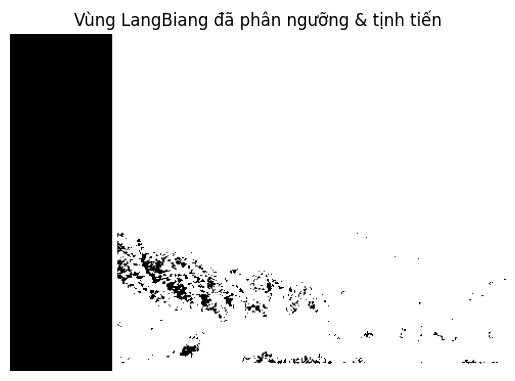

In [ ]:
from PIL import Image
import numpy as np
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

# Bước 1: Mở ảnh gốc từ thư mục exercise và chuyển sang ảnh xám
image = Image.open('exercise/dalat.jpg').convert('L')

# Bước 2: Cắt (crop) vùng LangBiang từ ảnh gốc
# Ví dụ: chọn vùng (top=300, left=400, bottom=600, right=900)
cropped = image.crop((15, 20,500, 350))

# Bước 3: Chuyển ảnh đã cắt thành mảng numpy
a = np.array(cropped)

# Bước 4: Áp dụng Otsu để tìm ngưỡng
otsu_thresh = threshold_otsu(a)

# Dùng ngưỡng nhân 0.3 để phân tách vùng LangBiang
final_thresh = otsu_thresh * 0.3
binary = (a > final_thresh).astype(np.uint8) * 255


# Bước 6: Lưu kết quả ra file
result_img = Image.fromarray(shifted)
result_img.save('lang_biang.jpg')

# Bước 5: Tịnh tiến vùng chọn sang phải 100px
shifted = np.zeros_like(binary)
if binary.shape[1] > 100:
    shifted[:, 100:] = binary[:, :-100]
else:
    shifted = binary  # Nếu ảnh quá nhỏ thì giữ nguyên
# Bước 7: Hiển thị kết quả
plt.imshow(shifted, cmap='gray')
plt.title('Vùng LangBiang đã phân ngưỡng & tịnh tiến')
plt.axis('off')
plt.show()


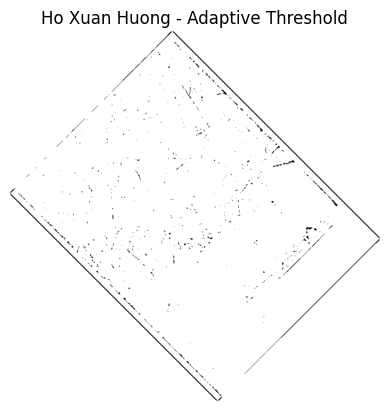

In [ ]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Bước 1: Mở ảnh gốc từ thư mục exercise và chuyển sang ảnh xám
image = Image.open('exercise/dalat.jpg').convert('L')

# Bước 2: Cắt vùng Hồ Xuân Hương từ ảnh (tọa độ ví dụ: left=200, top=300, right=800, bottom=700)
cropped = image.crop((500, 30, 1000, 670))
# Bước 3: Xoay vùng chọn một góc 45 độ
rotated = cropped.rotate(45, expand=True)

# Bước 4: Chuyển ảnh sang numpy array
a = np.array(rotated)

# Bước 5: Áp dụng Adaptive Threshold với ngưỡng 60
# Vì adaptiveThreshold của OpenCV yêu cầu ảnh phải là kiểu uint8
adaptive = cv2.adaptiveThreshold(
    a,                             # Ảnh đầu vào
    255,                           # Giá trị max
    cv2.ADAPTIVE_THRESH_MEAN_C,    # Phương pháp adaptive
    cv2.THRESH_BINARY,           
    blockSize=11,                  # Kích thước khung (phải là số lẻ)
    C=60                          
)

# Bước 6: Lưu kết quả
result_img = Image.fromarray(adaptive)
result_img.save('ho_xuan_huong.jpg')

# Bước 7: Hiển thị kết quả
plt.imshow(adaptive, cmap='gray')
plt.title('Ho Xuan Huong - Adaptive Threshold')
plt.axis('off')
plt.show()



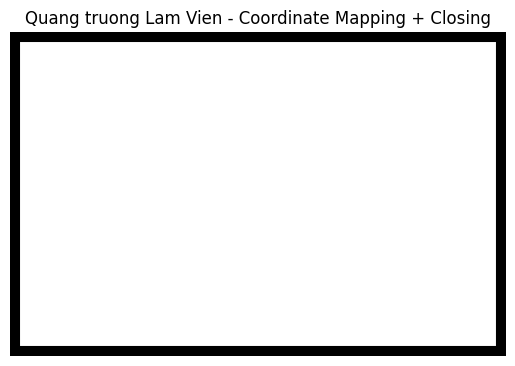

In [25]:
from PIL import Image
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt

# Bước 1: Mở ảnh gốc và chuyển sang ảnh xám
image = Image.open('exercise/dalat.jpg').convert('L')

# Bước 2: Cắt vùng Quảng trường Lâm Viên (tọa độ ví dụ, anh chỉnh lại cho đúng)
cropped = image.crop((1000, 20, 1490, 340))

# Bước 3: Chuyển thành numpy array
a = np.array(cropped)

# Bước 4: Dùng Coordinate Mapping - ví dụ: tịnh tiến ảnh sang phải 50px
# Tạo lưới tọa độ
coords = np.indices(a.shape)
coords_x = coords[1]
coords_y = coords[0]

# Áp dụng mapping: dịch sang phải 50px
mapped_x = coords_x - 50
mapped_y = coords_y

# Đảm bảo không vượt giới hạn
mapped_x = np.clip(mapped_x, 0, a.shape[1]-1)

# Lấy giá trị từ ảnh gốc theo tọa độ mới
mapped = a[mapped_y, mapped_x]

# Bước 5: Binary Closing để lấp kín lỗ nhỏ
# Định nghĩa structuring element
s = [[0,1,0],
     [1,1,1],
     [0,1,0]]

closed = nd.binary_closing(mapped, structure=s, iterations=10)

# Bước 6: Chuyển kết quả về ảnh
result_img = Image.fromarray((closed * 255).astype(np.uint8))
result_img.save('quan_truong_lam_vien.jpg')

# Bước 7: Hiển thị kết quả
plt.imshow(result_img, cmap='gray')
plt.title('Quang truong Lam Vien - Coordinate Mapping + Closing')
plt.axis('off')
plt.show()


=== MENU ===
Geometric Transformation:
 1. coordinate_mapping
 2. rotate
 3. scale
 4. shift
Segment:
 5. adaptive_threshold
 6. binary_dilation
 7. binary_erosion
 8. otsu

Bạn có thể nhập 1 số (ví dụ: 2) hoặc nhập 2 số cách nhau (ví dụ: 2 6)
Dùng phương pháp Otsu để phân ngưỡng


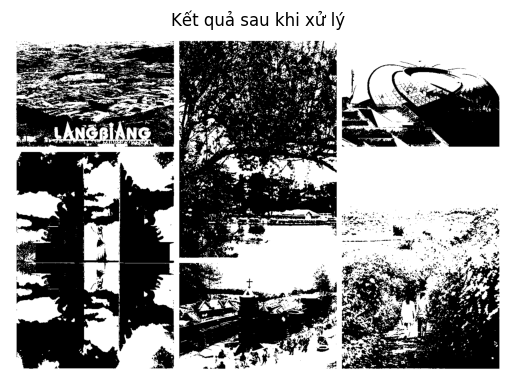

In [35]:
from PIL import Image
import numpy as np
import scipy.ndimage as nd
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt

# Mở sẵn ảnh để demo
img = Image.open('exercise/dalat.jpg').convert('L')
a = np.array(img)

def coordinate_mapping(image):
    print("Áp dụng Coordinate Mapping: tịnh tiến sang phải 50px")
    coords = np.indices(image.shape)
    mapped_x = np.clip(coords[1] - 50, 0, image.shape[1]-1)
    mapped = image[coords[0], mapped_x]
    return mapped

def rotate(image):
    print("Xoay ảnh 45 độ")
    return nd.rotate(image, 45, reshape=True)

def scale(image):
    print("Phóng to ảnh lên 1.5 lần")
    return nd.zoom(image, 1.5)

def shift(image):
    print("Tịnh tiến ảnh xuống 50px")
    return nd.shift(image, (50,0))

def adaptive_threshold(image):
    print("Dùng ngưỡng Adaptive Threshold với ngưỡng C=60")
    import cv2
    return cv2.adaptiveThreshold(
        image.astype(np.uint8), 255,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY, 11, 60)

def binary_dilation(image):
    print("Thực hiện Binary Dilation")
    return nd.binary_dilation(image, iterations=10) * 255

def binary_erosion(image):
    print("Thực hiện Binary Erosion")
    return nd.binary_erosion(image, iterations=10) * 255

def otsu(image):
    print("Dùng phương pháp Otsu để phân ngưỡng")
    thresh = threshold_otsu(image)
    return (image > thresh).astype(np.uint8) * 255

# Menu nhóm chức năng
menu_geo = {
    '1': ('coordinate_mapping', coordinate_mapping),
    '2': ('rotate', rotate),
    '3': ('scale', scale),
    '4': ('shift', shift)
}

menu_seg = {
    '5': ('adaptive_threshold', adaptive_threshold),
    '6': ('binary_dilation', binary_dilation),
    '7': ('binary_erosion', binary_erosion),
    '8': ('otsu', otsu)
}

print("=== MENU ===")
print("Geometric Transformation:")
for k,v in menu_geo.items():
    print(f" {k}. {v[0]}")

print("Segment:")
for k,v in menu_seg.items():
    print(f" {k}. {v[0]}")

print("\nBạn có thể nhập 1 số (ví dụ: 2) hoặc nhập 2 số cách nhau (ví dụ: 2 6)")

# Nhập lựa chọn
choices = input("Nhập lựa chọn của bạn: ").split()

# Xử lý lựa chọn
result = a.copy()

for c in choices:
    if c in menu_geo:
        result = menu_geo[c][1](result)
    elif c in menu_seg:
        result = menu_seg[c][1](result)
    else:
        print(f"Không có chức năng số {c}")

# Nếu ảnh nhị phân hoặc bool, cần convert
if result.dtype == bool:
    result = (result * 255).astype(np.uint8)
elif result.dtype != np.uint8:
    result = result.astype(np.uint8)

# Hiển thị kết quả
plt.imshow(result, cmap='gray')
plt.axis('off')
plt.title('Kết quả sau khi xử lý')
plt.show()
